In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import time

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows in the dataset")

There are 31 columns and 284807 rows in the dataset


In [5]:
n_replica = 10
df = pd.DataFrame(np.repeat(df.values, n_replica, axis=0), columns=df.columns)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [6]:
df = df.sample(frac=1).reset_index(drop=True)

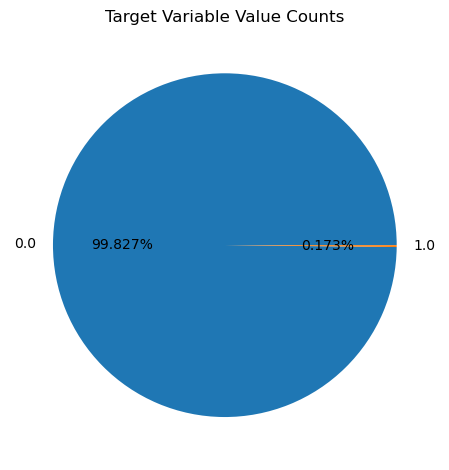

In [7]:
label = df.Class.unique()
cnt = df.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(cnt, labels=label, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.tight_layout()

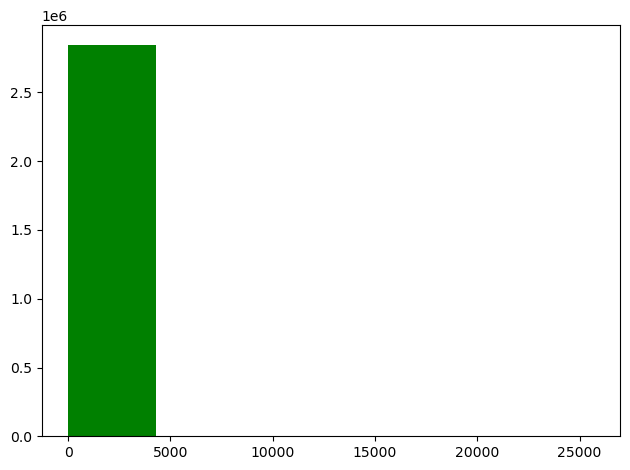

In [8]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g');
plt.tight_layout()

In [9]:
print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [10]:
df.iloc[:,1:30] = StandardScaler().fit_transform(df.iloc[:,1:30])
df2 = df.values

In [11]:
X = df2[:, 1:30]
Y = df2[:, 30]

In [12]:
X = normalize(X, norm="l1")

In [13]:
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

X.shape:  (2848070, 29)
Y.shape:  (2848070,)


In [14]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 3648)
print("Shape of training set: ", train_x.shape)
print("Shape of testing set: ", test_x.shape)

Shape of training set:  (1993649, 29)
Shape of testing set:  (854421, 29)


In [15]:
w_train = compute_sample_weight('balanced', train_y)

In [16]:
dtree = DecisionTreeClassifier(random_state = 213, max_depth = 4)

In [17]:
dtree.fit(train_x, train_y, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=213)

In [25]:
prediction = dtree.predict_proba(test_x)[:,1]

In [27]:
print("The Receiver Operating Characteristic (ROC) curve and the Area Under the ROC curve (AUC) are: ", roc_auc_score(test_y, prediction))

The Receiver Operating Characteristic (ROC) curve and the Area Under the ROC curve (AUC) are:  0.974392120922304


In [28]:
svm = LinearSVC(class_weight='balanced', random_state=7332, loss='hinge', fit_intercept=False)
svm.fit(train_x, train_y)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=7332)

In [30]:
pred = svm.decision_function(test_x)

In [31]:
from sklearn.metrics import hinge_loss

In [32]:
hinge_loss(test_y, pred)

0.22846336193218325